# Hands On Data in Astronomy Pt. 1

In this fist part we will lear how to work with Units, Coordinates and Tables (including fits files)

## Table of contents
 - [0. Setup](#0.-Setup)
 - [1. Units and Quantities](#1.-Units-and-Quantities)
 - [2. Coordinates](#2.-Coordinates)
    - [2.1 ALT / AZ coordinates](#2.1-ALT-/-AZ-coordinates)
 - [3. Tables](#3.-Tables)
    - [3.1 Basics](#3.1-Basics)
    - [3.2 Accessing rows and columns](#3.2-Accessing-rows-and-columns)
    - [3.3 Reading / Writing tables to disk](#3.3-Reading-/-Writing-tables-to-disk)
 - [4. Read FITS files](#4.-Read-FITS-files)
    - [4.1 Primary](#4.1-Primary)
    - [4.2 Events](#4.2-Events)
    - [4.3 GTI](#4.3-GTI)
    - [4.4 Effective Area](#4.4-Effective-Area)
    - [4.5 Energy Dispersion](#4.5-Energy-Dispersion)



## What is Astropy?


    "The Astropy Project is a community effort to develop a single core package for Astronomy in Python and foster interoperability between Python astronomy packages."


The concept and structure of the package is decribed in more detail in the first [Astropy paper 2013](http://adsabs.harvard.edu/abs/2013A%26A...558A..33A). The development infrastructure
and status of the v2.0 core package is described in the second [Astropy paper 2018](http://adsabs.harvard.edu/abs/2018AJ....156..123A).

The **Astropy package is structured into several submodules** and we will cover (what we consider) the most important of them in the following order:

1. [astropy.units](http://docs.astropy.org/en/stable/units/index.html) and in particular [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html) to do astronomical calculations with units.

2. [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) and in particular the classes [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) and [Angle](http://docs.astropy.org/en/stable/coordinates/angles.html) to handle astronomical sky positions, coordinate systems and coordinate transformations.

3. [astropy.tables](http://docs.astropy.org/en/stable/table/index.html) and the [Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html) class to handle astronomical data tables.

4. [astropy.io.fits](http://docs.astropy.org/en/stable/io/fits/index.html) to open and write data files in [FITS format](https://fits.gsfc.nasa.gov/fits_documentation.html).


# 0. Setup
[back to top](#Table-of-contents)

Check package versions. All examples should work with Astropy > 2.0 and Numpy > 1.11

In [132]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import astropy
print('numpy:', np.__version__)
print('astropy:', astropy.__version__)

numpy: 1.24.4
astropy: 5.3.3


# 1. Units and Quantities

The [astropy.units]() subpackage provides functions and classes to handle physical quantities with units. 


The recommended way to import the `astropy.units` submodule is: 

In [3]:
from astropy import units as u

`Quantities` are created by multiplying any number with a unit object:

In [136]:
distance = 1. * u.parsec
print( distance.to( u.lightyear) )
print(distance)

3.2615637771674333 lyr
1.0 pc


Or by passing a string to the general `Quantity` object:

In [137]:
distance = u.Quantity('1 lyr')

Check the availabe units with tab completion on the units module, `u.<TAB>`.

Quantities can be also created using lists and arrays:

In [138]:
distances = [1, 3, 10] * u.lightyear
print(distances)

distances = np.array([1, 3, 10]) * u.lightyear
print(distances)

[ 1.  3. 10.] lyr
[ 1.  3. 10.] lyr


In [139]:
distances.value

array([ 1.,  3., 10.])

In [140]:
np.mean( distances)

<Quantity 4.66666667 lyr>

The quantity object has a value attribute, which is a plain `numpy.ndarray`:

In [141]:
type(distances.value)

numpy.ndarray

And a unit, which is represented by a `astropy.units.core.Unit` object:

In [10]:
distances.unit

Unit("lyr")

In [11]:
type(distances.unit)

astropy.units.core.Unit

In [12]:
type(3.)

float

A quantity behaves in many ways just like a `numpy.ndarray` with an attached unit.

In [13]:
distances * 10

<Quantity [ 10.,  30., 100.] lyr>

Many numpy functions will work as expected and return again a `Quantity` object:

In [14]:
np.max(distances)

<Quantity 10. lyr>

In [15]:
np.mean(distances)

<Quantity 4.66666667 lyr>

But there are exceptions, where the unit handling is not well defined, e.g. in `np.log` arguments have to be dimensionless, such as:

In [16]:
#np.log(30 * u.MeV) # Will raise an UnitConversionError
np.log(30 * u.MeV / (1 * u.MeV))

<Quantity 3.40119738>

In [17]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


Probably the most useful method on the `Quantity` object is the `.to()` method which allows to convert a quantity to different units:

In [23]:
distance.to('meter')

<Quantity 9.46073047e+15 m>

In [24]:
distance.to(u.parsec)

<Quantity 0.30660139 pc>

Quantities can be combined with any arithmetical expression to derive other quantities, `astropy.units` will propagate
the units correctly:

In [25]:
speed_of_light = distance / u.year
print(speed_of_light.to('km/s'))

299792.458 km / s


In [26]:
from astropy import constants as const

print(const.c.to('km / s'))

299792.458 km / s


In [27]:
print(const.c.to('cm / ns'))

29.979245800000008 cm / ns


Here is a [list of available constants](http://docs.astropy.org/en/stable/constants/#module-astropy.constants).

If you write a function you can make sure the input is given in the right units using the [astropy.units.quantity_input](http://docs.astropy.org/en/stable/api/astropy.units.quantity_input.html#astropy.units.quantity_input) decorator: 

### Exercises

- (*easy*) How long does the light travel from the sun to the earth in minutes? How long does the light travel from the Galactic center (assume a distance of 8 kpc) in years? 
- (*intermediate*) The tzar bomb was about 50 TNT. One TNT is about 4.2 Giga Joule. How many Giga Joule were released by the Tsar bomb? If we were to convert the human body to energy, how many Tsar bomb would that be equivalent to? Assume a human of 70 Kg.
- (*advanced*) Define a new unit called `"baro-meter"`, which is eqivalent to 25 cm and use it to measure the height of the empire state building (assume a height of 381 meters). Please read the [Astropy documentation on combining and defining units](http://docs.astropy.org/en/stable/units/combining_and_defining.html) for an example how to do this (For other ways to measure the height of a building using a barometer see [barometer question on Wikipedia](https://en.wikipedia.org/wiki/Barometer_question)...)


In [153]:
#tnt = u.Unit('TNT', 4.18*u.GJ)
#zar = 50e6*tnt
#zar = u.Unit('zar' , 243*u.PJ)
#human_body = 70* u.kg * const.c**2
#human_body.to( zar)

# 2. Coordinates

[back to top](#Table-of-contents)

With the submodule [astropy.coordinates](http://docs.astropy.org/en/stable/coordinates/) Astropy provides a framework to handle sky positions in various coordinate systems and transformations between them.


The basic class to handle sky coordinates is [SkyCoord](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html):

In [28]:
from astropy.coordinates import SkyCoord

It can be created by passing a position angle for longitude and latitude and a keyword specifying a coordinate frame:

In [29]:
position_crab = SkyCoord(83.63 * u.deg,  22.01 * u.deg, frame='icrs')
print(position_crab)

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63, 22.01)>


As for `Quantities` the instanciation with `lists`, `arrays` or even `Quantities` also works:

In [30]:
positions = SkyCoord([345., 234.3] * u.deg,  [-0.1, 0.2] * u.deg, frame='galactic')

Alternatively the angles can be specified as string:

In [161]:
position_crab = SkyCoord('5h34m31.97s', '22d0m52.10s', frame='icrs')

# or

position_crab = SkyCoord('5:34:31.97', '22:0:52.10',
                         unit=(u.hour, u.deg), frame='icrs')

In [163]:
position_crab

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

In [172]:
position_crab.separation( position_crab )

<Angle 0. deg>

In [175]:
position_gal_cen = SkyCoord(0 * u.deg,0 * u.deg,  frame='galactic')
position_crab.separation( position_gal_cen )

<Angle 172.64076197 deg>

Where in the first case the unit doesn't have to specified because it is encoded in the string via `'hms'` and `'dms'`.

A very convenient way to get the coordinates of an individual object is qerying the [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) database with `SkyCoord.from_name()`:

In [32]:
SkyCoord.from_name('Polaris')

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

To transform the coordinates to a different coordinate system we can use `SkyCoord.transform_to()`:

In [33]:
pos_gal = position_crab.transform_to('galactic')
pos_gal

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

For convenience we can also directly use the `.galactic` or `.icrs` attributes:

In [34]:
position_crab.galactic

<SkyCoord (Galactic): (l, b) in deg
    (184.55754381, -5.78427369)>

In [35]:
position_crab.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (83.63320833, 22.01447222)>

To access the `longitude` and `latitude` angles individually: 

In [36]:
position_crab.data.lon

<Longitude 5.57554722 hourangle>

In [37]:
position_crab.data.lat

<Latitude 22.01447222 deg>

## 2.1 ALT / AZ coordinates

In various cirumstances, e.g. for planning observations, it can be usefull to transform a sky coordinate into a position in the horizontal coordinate system given a location on earth and a time

See:  https://en.wikipedia.org/wiki/Azimuth#/media/File:Azimuth-Altitude_schematic.svg

In [38]:
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time

We define a location using [EarthLocation](http://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html):

In [39]:
Padova= EarthLocation(lat=45.406435 * u.deg, lon=11.876761 * u.deg)
print(Padova.geodetic)



GeodeticLocation(lon=<Longitude 11.876761 deg>, lat=<Latitude 45.406435 deg>, height=<Quantity -1.36248431e-09 m>)


And a time using the [Time](http://docs.astropy.org/en/stable/api/astropy.time.Time.html) object:

In [210]:
now = Time.now()
print(now)

2023-09-21 10:55:22.974279


In [41]:
now += 7 * u.hour

In [42]:
now

<Time object: scale='utc' format='datetime' value=2023-09-21 16:03:21.462364>

Now we can define a horizontal coordinate system using the [AltAz]([docs.astropy.org/en/stable/api/astropy.coordinates.AltAz.html) class and use it to convert from the sky coordinate:

In [43]:
position = SkyCoord.from_name('Polaris')

In [182]:
altazPadova = AltAz(obstime=now, location=Padova)
altaz       = position.transform_to(altazPadova)
print(altaz)

<SkyCoord (AltAz: obstime=2023-09-21 16:03:21.462364, location=(4389514.25342687, 923156.45903806, 4519174.48628577) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0.41334787, 44.83702682)>


### Exercises

- (*easy*) Define the sky coordinate for your favorite astronomical object and find the angular distance to the Crab Nebula as well as the Galactic center.
- (*expert*) Make a plot of the height above horizon vs.time for the crab position at the location of Padova in the next 24 hours. Mark the time range where it is visible. Would the Crab Nebula be visible tonight?

In [200]:
from astropy.time import TimezoneInfo

In [216]:
now = Time.now()
print(now)
time_array = now + np.arange(0,24,0.2) * u.h


EST = TimezoneInfo(utc_offset=2*u.hour)  # UTC+2


times     = []
altitudes = []
for t in time_array:
    altazPadova = AltAz(obstime=t, location=Padova)
    altaz       = position.transform_to(altazPadova)
    altitudes.append(altaz.alt.to(u.deg).value )
    
    t = t.to_datetime(timezone=EST)
    
    times.append( t.hour + t.minute/60 + t.second/3600)

2023-09-21 10:56:10.758432


# 3. Tables

[back to top](#Table-of-contents)

Astropy provides the [Table](http://docs.astropy.org/en/stable/api/astropy.io.votable.tree.Table.html) class in order to handle data tables.



## 3.1 Basics

Table objects can be created as shown in the following

In [45]:
from astropy.table import Table

In [46]:
table = Table()

We add columns to the table like we would add entries to a dictionary

In [47]:
table['Source_Name'] = ['Crab', 'Sag A*', 'Cas A', 'Vela Junior']
table['GLON'] = [184.5575438, 0, 111.74169477, 266.25914205] * u.deg
table['GLAT'] = [-5.78427369, 0, -2.13544151, -1.21985818] * u.deg
table['Source_Class'] = ['pwn', 'unc', 'snr', 'snr']

By executing the following cell, we get a nicely formatted version of the table printed in the notebook:

In [48]:
table

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


## 3.2 Accessing rows and columns

We have access to the defined columns. To check which ones are availbe you can use `Table.colnames`:

In [49]:
table.colnames

['Source_Name', 'GLON', 'GLAT', 'Source_Class']

And access individual columns just by their name:

In [50]:
table['GLON']

184.5575438
0.0
111.74169477
266.25914205


And also a subset of columns:

In [51]:
table[['Source_Name', 'GLON']]

Source_Name,GLON
,deg
str11,float64
Crab,184.5575438
Sag A*,0.0
Cas A,111.74169477
Vela Junior,266.25914205


Often, it is handy to get the column data as [astropy.units.Quantity](http://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity) using the `.quantity` property:

In [52]:
table['GLON'].quantity

<Quantity [184.5575438 ,   0.        , 111.74169477, 266.25914205] deg>

Rows can be accessed using numpy indexing:

In [53]:
table[0:2]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc


Or by using a boolean numpy array for indexing:

In [54]:
selection = table['Source_Name'] == 'Crab'
table[selection]

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
str11,float64,float64,str3
Crab,184.5575438,-5.78427369,pwn


There is also a more sophisticated indexing scheme, which is explained [here](http://docs.astropy.org/en/stable/table/indexing.html), but not covered in this tutorial.

## 3.3 Reading / Writing tables to disk
Astropy tables can be serialized into many formats. For an overview see [here](http://docs.astropy.org/en/latest/io/unified.html#built-in-table-readers-writers). To write the table in FITS format we can use:

In [55]:
table.write('example.fits', overwrite=True, format='fits')

In [58]:
Table.read('example.fits')

Source_Name,GLON,GLAT,Source_Class
,deg,deg,
bytes11,float64,float64,bytes3
Crab,184.5575438,-5.78427369,pwn
Sag A*,0.0,0.0,unc
Cas A,111.74169477,-2.13544151,snr
Vela Junior,266.25914205,-1.21985818,snr


## Exercises

-  Add columns with the `RA` and `DEC` coordinates of the objects to the example table.

# 4. Read FITS files

[back to top](#Table-of-contents)

The [flexible image transport system](https://fits.gsfc.nasa.gov/fits_documentation.html) format (FITS) is widely used data format for astronomical images and tables. As example we will use idata from the Crab nebula taken with the MAGIC telescope

See also: https://gamma-astro-data-formats.readthedocs.io/en/v0.3/general/time.html




In [135]:
from astropy.io import fits

To open the fits file we use `fits.open()` and just specify the filename as an argument:

In [134]:
# Get the value of the environment variable
import os

gammapy_data_path = os.environ.get('GAMMAPY_DATA')
if not gammapy_data_path:
    raise ValueError("The GAMMAPY_DATA environment variable is not set!")


In [109]:
# Construct the full path to the FITS file
# 'cta-1dc/data/baseline/gps/gps_baseline_111630.fits'
# 'magic/rad_max/data/magic_dl3_run_05029748.fits'
fits_file_path = os.path.join(gammapy_data_path, 'magic/rad_max/data/magic_dl3_run_05029748.fits')
print(fits_file_path)

/Users/giacomodamico/Desktop/CTA/0_Analysis/4_GAMMAPY_19/gammapy-datasets/magic/rad_max/data/magic_dl3_run_05029748.fits


In [110]:
fits_file = fits.open(fits_file_path)

In [111]:
fits_file.info()

Filename: /Users/giacomodamico/Desktop/CTA/0_Analysis/4_GAMMAPY_19/gammapy-datasets/magic/rad_max/data/magic_dl3_run_05029748.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  EVENTS        1 BinTableHDU     53   13121R x 5C   [1K, 1D, 1E, 1E, 1E]   
  2  GTI           1 BinTableHDU     24   1R x 2C   [1D, 1D]   
  3  RAD_MAX       1 BinTableHDU     33   1R x 5C   [28E, 28E, 1E, 1E, 28E]   
  4  EFFECTIVE AREA    1 BinTableHDU     35   1R x 5C   [20E, 20E, 1E, 1E, 20E]   
  5  ENERGY DISPERSION    1 BinTableHDU     36   1R x 7C   [20E, 20E, 28E, 28E, 1E, 1E, 560E]   


In [100]:
fits_file = fits.open('data_test/run_05029747_DL3.fits')

We can retrieve some basic information on the  header data unit (HDU) by calling `.info()`:

In [112]:
fits_file.info()

Filename: /Users/giacomodamico/Desktop/CTA/0_Analysis/4_GAMMAPY_19/gammapy-datasets/magic/rad_max/data/magic_dl3_run_05029748.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  EVENTS        1 BinTableHDU     53   13121R x 5C   [1K, 1D, 1E, 1E, 1E]   
  2  GTI           1 BinTableHDU     24   1R x 2C   [1D, 1D]   
  3  RAD_MAX       1 BinTableHDU     33   1R x 5C   [28E, 28E, 1E, 1E, 28E]   
  4  EFFECTIVE AREA    1 BinTableHDU     35   1R x 5C   [20E, 20E, 1E, 1E, 20E]   
  5  ENERGY DISPERSION    1 BinTableHDU     36   1R x 7C   [20E, 20E, 28E, 28E, 1E, 1E, 560E]   


## 4.1 Primary

In [113]:
primary = fits_file['PRIMARY'] 

#or

primary = fits_file[0] 

In [114]:
primary.data

Additional meta information is stored in the `.header` attribute:

In [115]:
primary.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

## 4.2 Events

In [228]:
events = fits_file['EVENTS']

Using header we get all the information on how this events were collected

In [229]:
events.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   28 / width of table in bytes                        
NAXIS2  =                13121 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'EVENT_ID'           / label for field   1                            
TFORM1  = '1K      '           / data format of field: 8-byte INTEGER           
TTYPE2  = 'TIME    '           / label for field   2                            
TFORM2  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT2  = 's       '        

In [232]:
events.columns.names

['EVENT_ID', 'TIME', 'RA', 'DEC', 'ENERGY']

In Astropy Table format

In [236]:
events_table = Table( events.data )
events_table

EVENT_ID,TIME,RA,DEC,ENERGY
int64,float64,float32,float32,float32
45,333780072.924045,82.171776,22.421804,0.05833082
55,333780072.96587616,83.7298,22.292458,0.050995573
84,333780073.07869804,83.79548,21.145731,0.039031275
120,333780073.1953195,82.03501,21.570885,0.040015426
123,333780073.20475286,83.60063,21.996529,0.13071066
182,333780073.4312252,83.74355,22.04678,0.057374142
232,333780073.5817839,83.505615,22.118025,0.04792382
...,...,...,...,...
7382,333781255.7007259,82.49239,21.967741,0.039261505


In [237]:
ra  = events_table['RA']
dec = events_table['DEC']

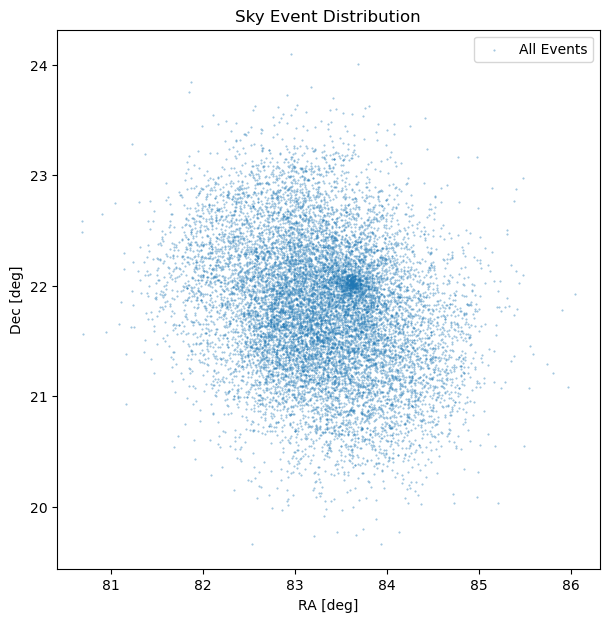

In [239]:
# Direction of the events
fig, ax =  plt.subplots(figsize=(7,7))
#ax = plt.subplot(projection=wcs)

ax.scatter(ra,dec, s=0.2, alpha=0.5, label="All Events")



plt.ylabel('Dec [deg]')
plt.xlabel('RA [deg]')
plt.title('Sky Event Distribution')
ax.legend(loc="best")

In [242]:
energies  = events_table['ENERGY']

Text(0.5, 1.0, 'Energy distribution')

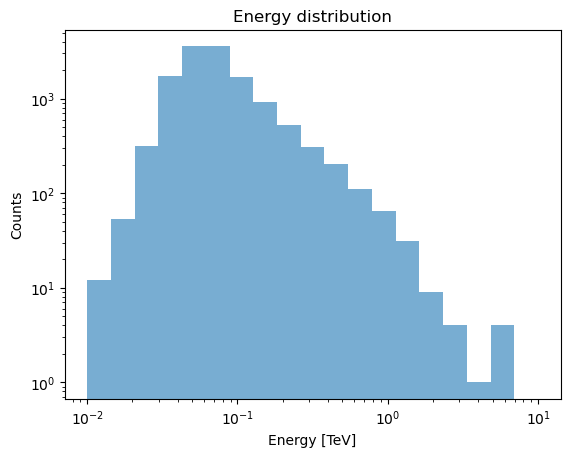

In [243]:

binning = np.logspace(-2,1,20)

plt.hist(energies,bins=binning,alpha=0.6,log=True)
plt.xscale('log')

plt.xlabel('Energy [TeV]')
plt.ylabel('Counts')
plt.title('Energy distribution')

## Excercise

 - Add on the Sky plot the poition of the source and the position of the pointing of the telescope

## 4.3 GTI

In [120]:
gti = fits_file['GTI']

In [234]:
gti.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   16 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    2 / number of fields in each row                   
TTYPE1  = 'START   '           / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'STOP    '           / label for field   2                            
TFORM2  = '1D      '        

In [122]:
Table( gti.data )

START,STOP
float64,float64
333780064.0,333781248.0


## 4.4 Effective Area

In [123]:
effective_area = fits_file['EFFECTIVE AREA']

In [124]:
effective_area.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  248 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    5 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = '20E     '           / data format of field: 4-byte REAL              
TUNIT1  = 'TeV     '           / physical unit of field                         
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = '20E     '        

In [125]:
Table( effective_area.data)

ENERG_LO,ENERG_HI,THETA_LO,THETA_HI,EFFAREA
float32[20],float32[20],float32,float32,"float32[1,20]"
0.0050000004 .. 31.547869,0.007924466 .. 50.000004,0.39,0.41,0.0 .. 0.0


## 4.5 Energy Dispersion

In [126]:
en_disp = fits_file['ENERGY DISPERSION']

In [127]:
en_disp.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                 2632 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'ENERG_LO'           / label for field   1                            
TFORM1  = '20E     '           / data format of field: 4-byte REAL              
TUNIT1  = 'TeV     '           / physical unit of field                         
TTYPE2  = 'ENERG_HI'           / label for field   2                            
TFORM2  = '20E     '        

In [128]:
Table( en_disp.data )

ENERG_LO,ENERG_HI,MIGRA_LO,MIGRA_HI,THETA_LO,THETA_HI,MATRIX
float32[20],float32[20],float32[28],float32[28],float32,float32,"float32[1,28,20]"
0.0050000004 .. 31.547869,0.007924466 .. 50.000004,0.1 .. 9.646428,0.45357144 .. 10.0,0.39,0.41,0.0 .. 0.0
